In [10]:
# import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 42

In [4]:
# donnés

data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
feature_names = X.columns
print("Shape : ", X.shape)
print("Features : ", list(feature_names)[:4])
print("Target : ", y.name)

Shape :  (20640, 8)
Features :  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
Target :  MedHouseVal


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=RANDOM_STATE)

In [7]:
reg = DecisionTreeRegressor(
    criterion="squared_error",

    min_samples_leaf=5,
    max_depth=6,
    random_state=RANDOM_STATE)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, random_state=42)

In [8]:
# entrainemen t

reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")


MSE: 0.43
RMSE: 0.66
MAE: 0.47
R2: 0.68


<>:40: SyntaxWarning: invalid escape sequence '\h'
<>:40: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-577072840.py:40: SyntaxWarning: invalid escape sequence '\h'
  plt . ylabel ("Résidus (y - $\hat{y}$)")


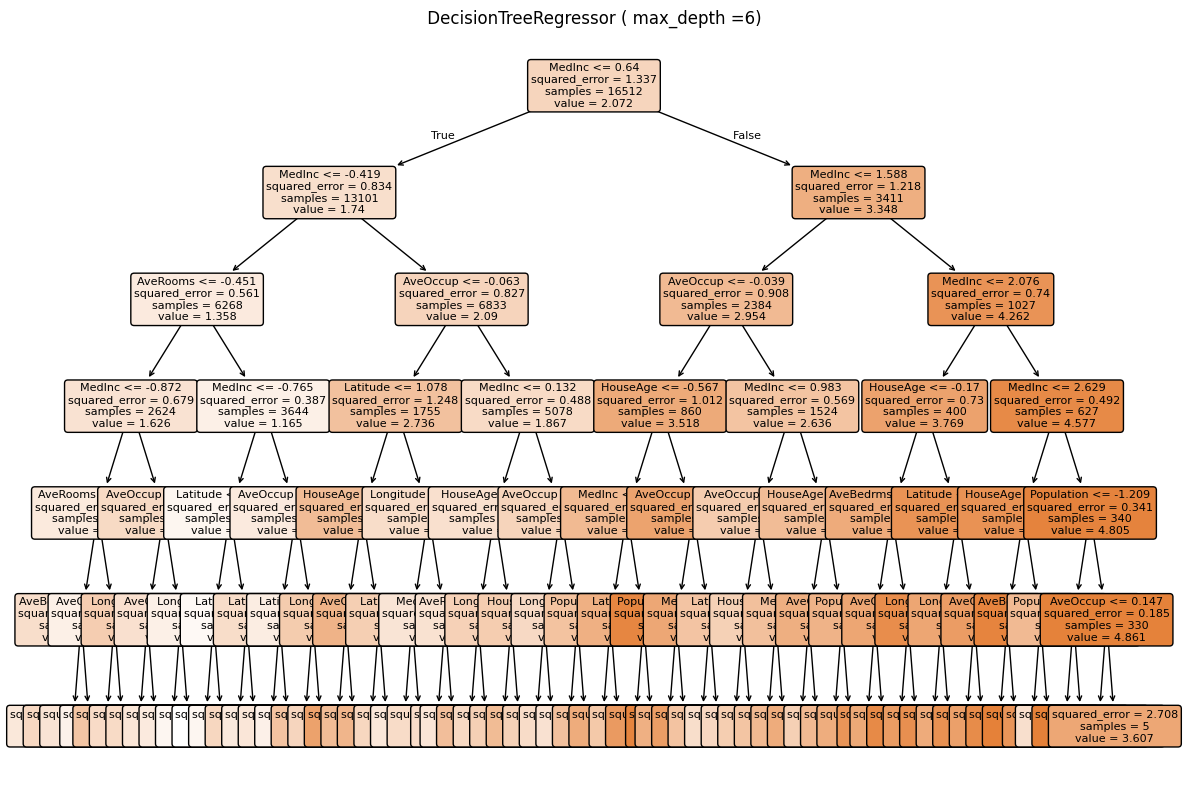

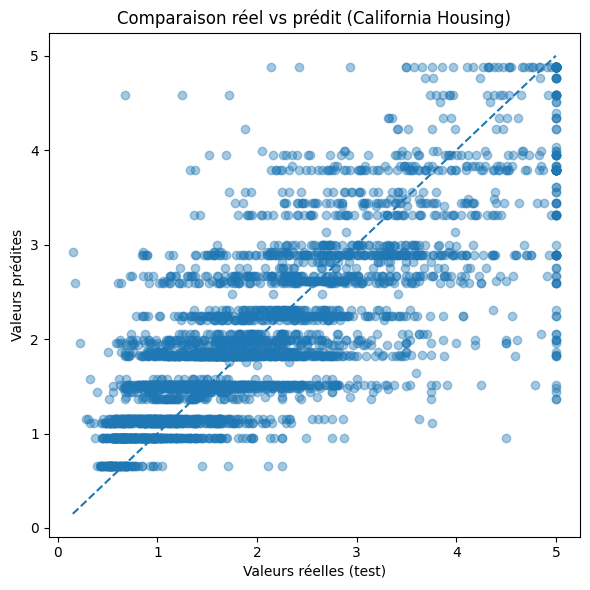

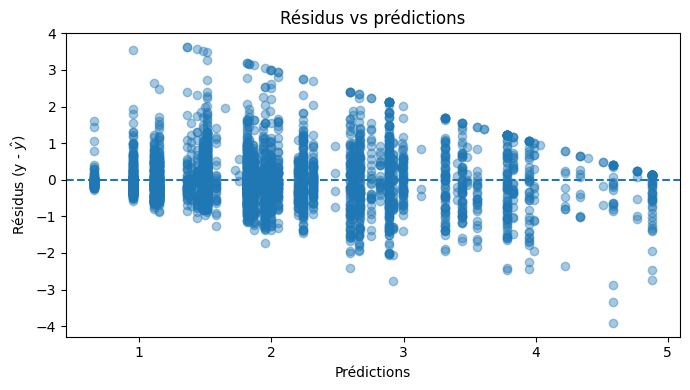

In [18]:
# 7. Visualisation de l’arbre ( attention a la taille )
# ==========================================================
plt.figure ( figsize =(12 , 8) )
plot_tree (
reg ,
feature_names = feature_names ,
filled = True ,
rounded = True ,
fontsize =8
)
plt . title (" DecisionTreeRegressor ( max_depth =6) ")
plt . tight_layout ()
plt . show ()

# ==========================================================
# 8. Graphique : y reel vs y predit
# ==========================================================

y_pred_test = reg.predict(X_test)

plt . figure ( figsize =(6 ,6) )
plt . scatter ( y_test , y_pred_test , alpha =0.4)
plt . plot ([ y_test .min () , y_test . max () ] ,
[ y_test .min () , y_test . max () ] ,
linestyle ="--")
plt . xlabel ("Valeurs réelles (test)")
plt . ylabel ("Valeurs prédites")
plt . title ("Comparaison réel vs prédit (California Housing)")
plt . tight_layout ()
plt . show ()

# ==========================================================
# 9. Graphique : residus
# ==========================================================
residuals = y_test - y_pred_test
plt . figure ( figsize =(7 ,4) )
plt . scatter ( y_pred_test , residuals , alpha =0.4)
plt . axhline (0 , linestyle ="--")
plt . xlabel ("Prédictions")
plt . ylabel (r"Résidus (y - $\hat{y}$)")
plt . title ("Résidus vs prédictions")
plt . tight_layout ()

# Task
Recalculate predictions for the test set (`X_test`) and then proceed with plotting the 'real vs predicted' and 'residuals vs predictions' graphs.

## recalculate_predictions_and_plot

### Subtask:
Recalculate predictions for the test set (`X_test`) and then proceed with plotting the 'real vs predicted' and 'residuals vs predictions' graphs.


## Summary:

### Data Analysis Key Findings
*   The predictions for the test set (`X_test`) were successfully recalculated using the trained model.
*   A "Real vs. Predicted" plot was generated, illustrating how closely the model's predictions align with the actual values.
*   A "Residuals vs. Predictions" plot was also created, showing the distribution of errors (residuals) against the predicted values. This plot helps in assessing the model's assumptions and identifying potential biases or patterns in the errors.

### Insights or Next Steps
*   Further analysis of the "Real vs. Predicted" plot is needed to quantitatively assess the model's accuracy, for example, by checking the R-squared value or Mean Absolute Error.
*   The "Residuals vs. Predictions" plot should be examined for any discernible patterns, such as a fanning-out or curved shape, which could indicate issues like heteroscedasticity or non-linearity not captured by the model, suggesting areas for model improvement.
